Facial Recognition using Eigenfaces

Load and Preprocess Images

In [92]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform  # or use OpenCV

# 1. Load your dataset: all images the same size, grayscale
image_size = (100, 100)  # e.g., (100, 100)
images = []
for fname in os.listdir("Pics"):
    fullpath = os.path.join("Pics", fname)
    img = io.imread(fullpath)
    if img.ndim == 3:
        img = color.rgb2gray(img)
    img = transform.resize(img, image_size, anti_aliasing=True)
    images.append(img.flatten())

X = np.array(images).T   # shape: (N, m) where N=r*c, m=number of images



Compute Mean Face and Center the Data

Subtract the mean image from all face vectors to center the data.

In [93]:
# Compute mean face
mean_face = np.mean(X, axis=1, keepdims=True)  # shape (N,1)

# Subtract mean => centred data
A = X - mean_face  # shape (N, m)



Compute Covariance Matrix and Find Eigenvectors

Use the covariance matrix to find eigenvalues and eigenvectors

In [94]:
# Compute covariance via smaller matrix trick
#    (if m << N)
L = A.T.dot(A)     # shape (m, m)
e_vals, e_vecs = np.linalg.eigh(L)  # eigen decomposition

# Sort eigenvalues (and vectors) descending
idx = np.argsort(e_vals)[::-1]
e_vals = e_vals[idx]
e_vecs = e_vecs[:, idx]

# Suppose X has been built already: X.shape = (N, m)
m = X.shape[1]

# A is the centred data matrix, shape (N, m)
# e_vecs is the (m × m) eigenvector matrix of the smaller covariance matrix
eigenfaces = A.dot(e_vecs)   # shape (N, m)

for j in range(m):
    eigenfaces[:, j] /= np.linalg.norm(eigenfaces[:, j])

k = 20
top_eigenfaces = eigenfaces[:, :k]



Visualize

(10000, 4)


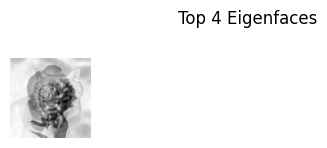

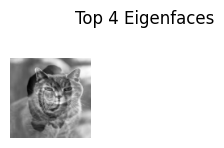

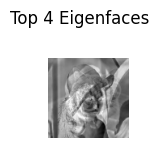

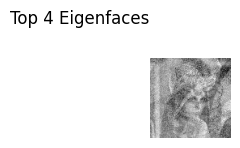

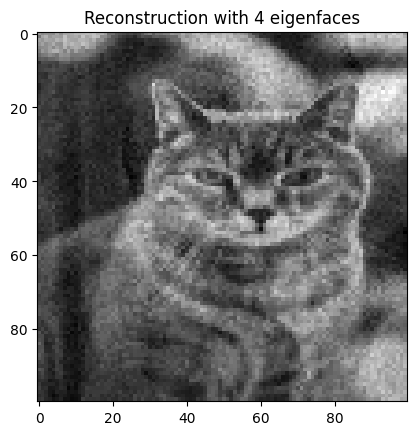

In [95]:

print(top_eigenfaces.shape)
k = top_eigenfaces.shape[1]


for j in range(k):
    plt.subplot(4,5,j+1)
    plt.imshow(top_eigenfaces[:, j].reshape(image_size), cmap='gray')
    plt.axis('off')
    plt.suptitle("Top {} Eigenfaces".format(k))
    plt.show()

    test_img = images[0].reshape(image_size) 

# Suppose you select one test image (reshaped to image_size) and flatten it
x = test_img.flatten()   # shape (N,)

# Project a face into eigenspace: compute weights
phi = x.reshape(-1,1) - mean_face  # shape (N,1)
w = top_eigenfaces.T.dot(phi)      # shape (k,1)

# 10. Reconstruct approximate face
x_approx = mean_face + top_eigenfaces.dot(w)
plt.imshow(x_approx.reshape(image_size), cmap='gray')
plt.title("Reconstruction with {} eigenfaces".format(k))
plt.show()
